<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Zahra Maleki

**Student ID**: 400110009



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

CRIM: Per capita crime rate.

ZN: Proportion of residential land zoned for large lots.

INDUS: Proportion of non-retail business acres.

CHAS: Binary variable indicating proximity to the Charles River.

NOX: Nitric oxides concentration.

RM: Average number of rooms per dwelling.

AGE: Proportion of owner-occupied units built before 1940.

DIS: Weighted distances to Boston employment centers.

RAD: Accessibility to radial highways.

TAX: Property tax rate.

PTRATIO: Pupil-teacher ratio.

B: Measure of racial diversity.

LSTAT: Percentage of lower status population.

In [3]:
df = pd.read_csv('boston.csv')
print("shape:", df.shape)

print(df.head())

shape: (506, 14)
      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [8]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print("Train rsquared=", r2_train)
print("Train RMSE=", rmse_train)
print("Test rsquared=", r2_test)
print("Test RMSE=", rmse_test)

coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("Coefficients=")
print(coefficients)

Train rsquared= 0.7508856358979672
Train RMSE= 4.6520331848801675
Test rsquared= 0.6687594935356316
Test RMSE= 4.9286021826653394
Coefficients=
    Feature  Coefficient
0      CRIM    -0.113056
1        ZN     0.030110
2     INDUS     0.040381
3      CHAS     2.784438
4        NX   -17.202633
5        RM     4.438835
6       AGE    -0.006296
7       DIS    -1.447865
8       RAD     0.262430
9       TAX    -0.010647
10  PTRATIO    -0.915456
11        B     0.012351
12    LSTAT    -0.508571


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [27]:
a = 10 ** np.linspace(3, -3, 100) * 0.5

r2_scores = []
mse_train = []
mse_test = []
coefficients = []
not_considered_features = []

for alpha in a:
    
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    r2_scores.append((alpha, r2_train, r2_test))

    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    
    coefficients.append(model.coef_)
    not_considered_features.append(np.sum(model.coef_ == 0))

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

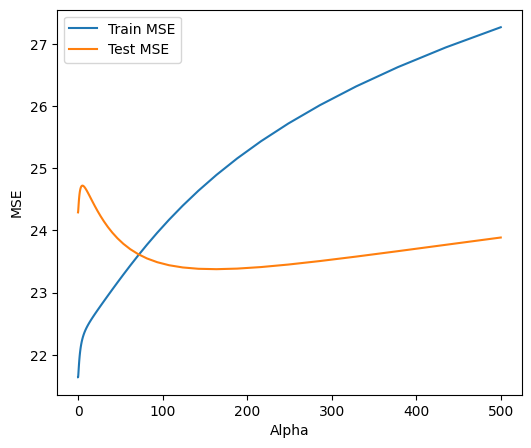

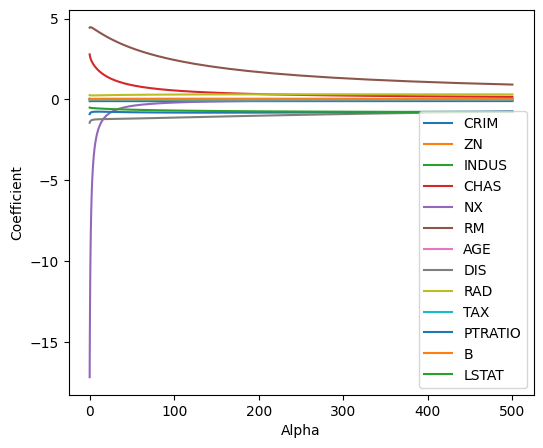

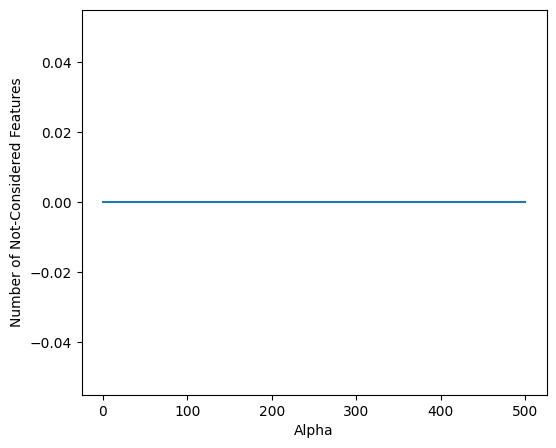

best Alpha: 163.72745814388642
MSE: 23.378168171507383
R-squared: 0.6812087531281752
Coefficients: [-0.11058924  0.03996102 -0.0520014   0.38073404 -0.115418    1.89720331
  0.00709776 -1.05241569  0.3094509  -0.01494741 -0.82272188  0.01159841
 -0.72589539]


In [28]:
plt.figure(figsize=(6, 5))
plt.plot(a, mse_train, label='Train MSE')
plt.plot(a, mse_test, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
for i in range(X.shape[1]):
    plt.plot(a, [coef[i] for coef in coefficients], label=X.columns[i])
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(a, not_considered_features)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.show()

best_alpha = a[np.argmin(mse_test)]
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
mse_optimal = mean_squared_error(y_test, y_test_pred)
r2_optimal = r2_score(y_test, y_test_pred)

print("best Alpha:", best_alpha)
print("MSE:", mse_optimal)
print("R-squared:", r2_optimal)
print("Coefficients:", model.coef_)

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

Lasso can be particularly useful when dealing with high-dimensional datasets where there are potentially many irrelevant or redundant features.

In [30]:
a = 10 ** np.linspace(3, -3, 100) * 0.5

r2_scores = []
mse_train = []
mse_test = []
coefficients = []
not_considered_features = []

for alpha in a:
    
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    r2_scores.append((alpha, r2_train, r2_test))

    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    
    coefficients.append(model.coef_)
    not_considered_features.append(np.sum(model.coef_ == 0))

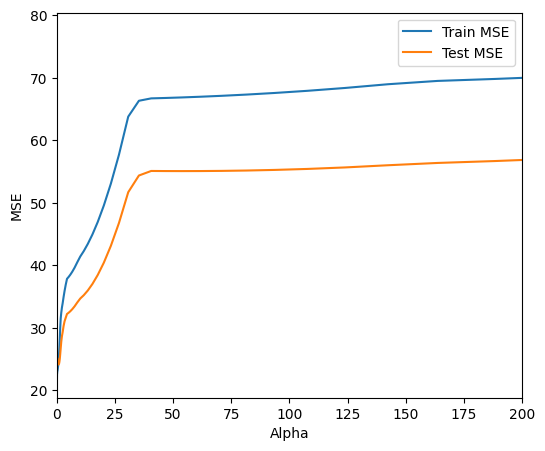

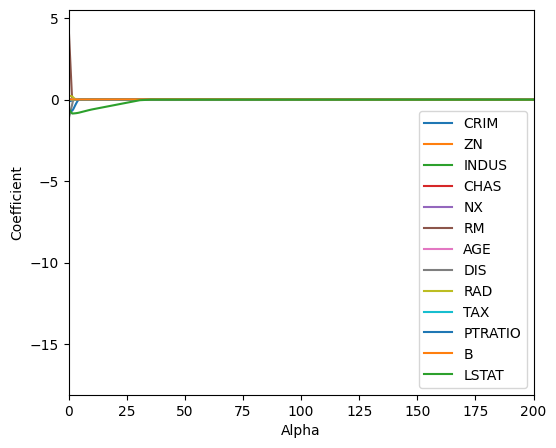

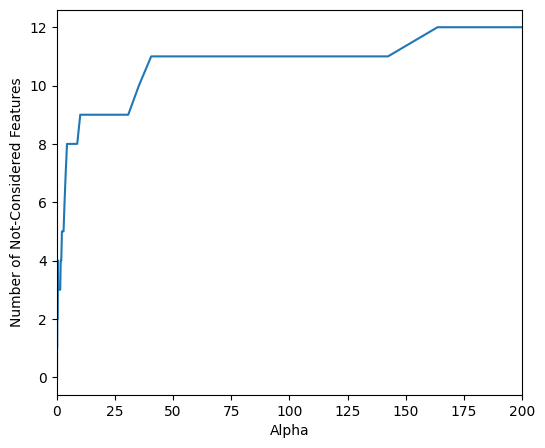

best Alpha: 0.7087370814634024
MSE: 24.421367414868886
R-squared: 0.6669833961589207
Coefficients: [ -0.10991477   0.03185174   0.01360583   2.5987258  -10.9617875
   4.46392505  -0.01113579  -1.35889887   0.2511996   -0.01131367
  -0.84442426   0.01258916  -0.52066232]


In [31]:
plt.figure(figsize=(6, 5))
plt.plot(a, mse_train, label='Train MSE')
plt.plot(a, mse_test, label='Test MSE')
plt.xlim([0, 200])
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
for i in range(X.shape[1]):
    plt.plot(a, [coef[i] for coef in coefficients], label=X.columns[i])
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.xlim([0, 200])
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(a, not_considered_features)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.xlim([0, 200])
plt.show()

best_alpha = a[np.argmin(mse_test)]
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
mse_optimal = mean_squared_error(y_test, y_test_pred)
r2_optimal = r2_score(y_test, y_test_pred)

print("best Alpha:", best_alpha)
print("MSE:", mse_optimal)
print("R-squared:", r2_optimal)
print("Coefficients:", model.coef_)

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

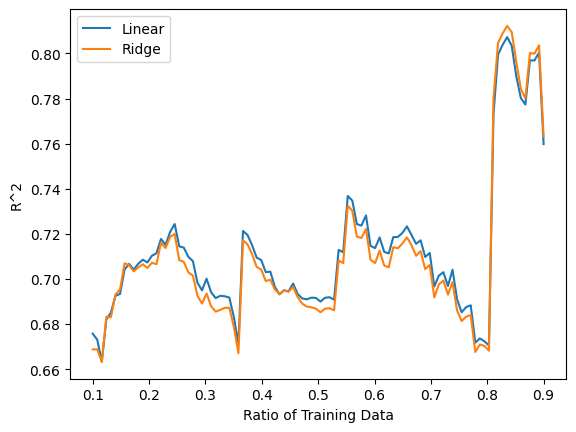

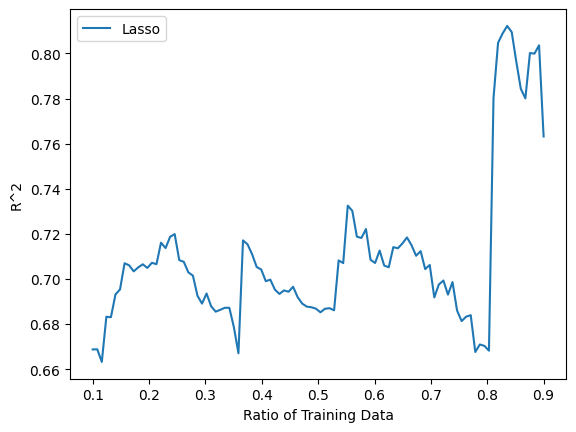

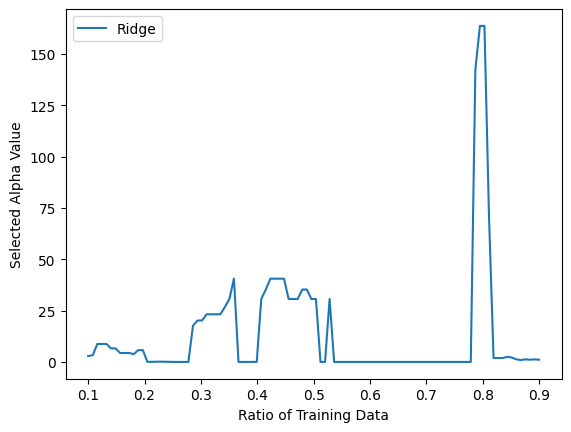

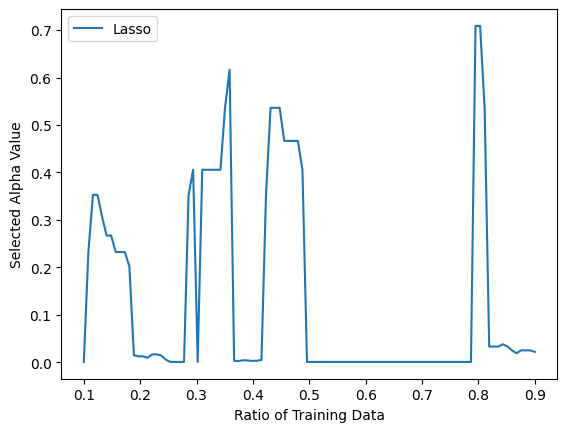

In [49]:
r = np.linspace(0.1, 0.9, 100)
a = 10 ** np.linspace(3, -3, 100) * 0.5

r2_linear = []
r2_ridge = []
r2_lasso = []
alphas_ridge = []
alphas_lasso = []


for ratio in r:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)

    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_test_pred_linear = linear_model.predict(X_test)
    r2_linear.append(r2_score(y_test, y_test_pred_linear))

    mse_test_rid = []
    mse_test_lass = []
    for alpha in a:
        
        model = Lasso(alpha=alpha)
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        mse_test_lass.append(mean_squared_error(y_test, y_test_pred))

        model = Ridge(alpha=alpha)
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        mse_test_rid.append(mean_squared_error(y_test, y_test_pred))
           
    best_alpha_rid = a[np.argmin(mse_test_rid)]
    model = Ridge(alpha=best_alpha)
    model.fit(X_train, y_train)
    y_test_pred_ridge = model.predict(X_test)
    r2_ridge.append(r2_score(y_test, y_test_pred_ridge))
    alphas_ridge.append(best_alpha_rid)

    best_alpha_lass = a[np.argmin(mse_test_lass)]
    model = Ridge(alpha=best_alpha)
    model.fit(X_train, y_train)
    y_test_pred_lasso = model.predict(X_test)
    r2_lasso.append(r2_score(y_test, y_test_pred_lasso))
    alphas_lasso.append(best_alpha_lass)


plt.figure()
plt.plot(r, r2_linear, label='Linear')
plt.plot(r, r2_ridge, label='Ridge')
plt.xlabel('Ratio of Training Data')
plt.ylabel('R^2')
plt.legend()
plt.show()

plt.figure()
plt.plot(r, r2_lasso, label='Lasso')
plt.xlabel('Ratio of Training Data')
plt.ylabel('R^2')
plt.legend()
plt.show()

plt.figure()
plt.plot(r, alphas_ridge, label='Ridge')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected Alpha Value')
plt.legend()
plt.show()

plt.figure()
plt.plot(r, alphas_lasso, label='Lasso')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected Alpha Value')
plt.legend()
plt.show()